In [14]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats


# Sample dataset
data = [
    42, 22, 55, 18, 50, 10, 33, 29, 17, 29, 29, 27, 34, 
    15, 40, 42, 40, 41, 35, 27, 44, 31, 38, 19, 54, 55, 38,
    19, 20, 30, 42, 59, 15, 19, 27, 23, 40, 32, 28, 51
]

# Find the range (difference between the maximum and minimum value)
range_val = max(data) - min(data)

# Number of classes (using Sturges' formula)
num_classes = math.ceil(1 + 3.322 * math.log10(len(data)))

# Class interval (range divided by the number of classes, rounded up)
class_interval = math.ceil(range_val / num_classes)

# Create frequency distribution table
min_val = min(data)
max_val = max(data)
interval_start = min_val

classes = []  # Class intervals
frequency = []  # Frequency counts
cumulative_frequency = []  # Cumulative frequency counts
relative_frequency = []  # Relative frequencies
class_boundaries = []  # Class boundaries
class_marks = []  # Class marks (midpoints)

# Generate the classes and calculate frequencies
for i in range(num_classes):
    class_start = interval_start
    class_end = interval_start + class_interval - 1
    
    if i == num_classes - 1:
        # For the last class, ensure it includes the maximum value in the data
        class_end = max_val
    
    classes.append(f"{class_start} - {class_end}")
    
    # Frequency (count of values falling in the current class interval)
    freq = sum(class_start <= x <= class_end for x in data)
    frequency.append(freq)
    
    # Cumulative frequency (running total of frequencies)
    cumulative_frequency.append(sum(frequency))
    
    # Relative frequency (frequency of the class divided by total number of data points)
    rel_freq = freq / len(data)
    relative_frequency.append(round(rel_freq, 3))
    
    # Class boundaries (lower and upper boundaries of each class)
    class_boundaries.append((class_start - 0.5, class_end + 0.5))
    
    # Class marks (midpoint of each class)
    class_marks.append((class_start + class_end) / 2)
    
    # Move to the next interval
    interval_start += class_interval

# Create the frequency distribution table
table = pd.DataFrame({
    'Classes': classes,
    'Tally Marks': ['|' * f for f in frequency],  # Visual tally marks for frequencies
    'Frequency': frequency,
    'Cumulative Frequency': cumulative_frequency,
    'Relative Frequency': relative_frequency,
    'Class Boundaries': class_boundaries,
    'Class Marks': class_marks
})

# Display results
print("Range:", range_val)
print("Number of Classes:", num_classes)
print("Class Interval:", class_interval)
print("\nFrequency Distribution Table:\n")
print(table)


Range: 49
Number of Classes: 7
Class Interval: 7

Frequency Distribution Table:

   Classes Tally Marks  Frequency  Cumulative Frequency  Relative Frequency  \
0  10 - 16         |||          3                     3               0.075   
1  17 - 23    ||||||||          8                    11               0.200   
2  24 - 30    ||||||||          8                    19               0.200   
3  31 - 37       |||||          5                    24               0.125   
4  38 - 44  ||||||||||         10                    34               0.250   
5  45 - 51          ||          2                    36               0.050   
6  52 - 59        ||||          4                    40               0.100   

  Class Boundaries  Class Marks  
0      (9.5, 16.5)         13.0  
1     (16.5, 23.5)         20.0  
2     (23.5, 30.5)         27.0  
3     (30.5, 37.5)         34.0  
4     (37.5, 44.5)         41.0  
5     (44.5, 51.5)         48.0  
6     (51.5, 59.5)         55.5  


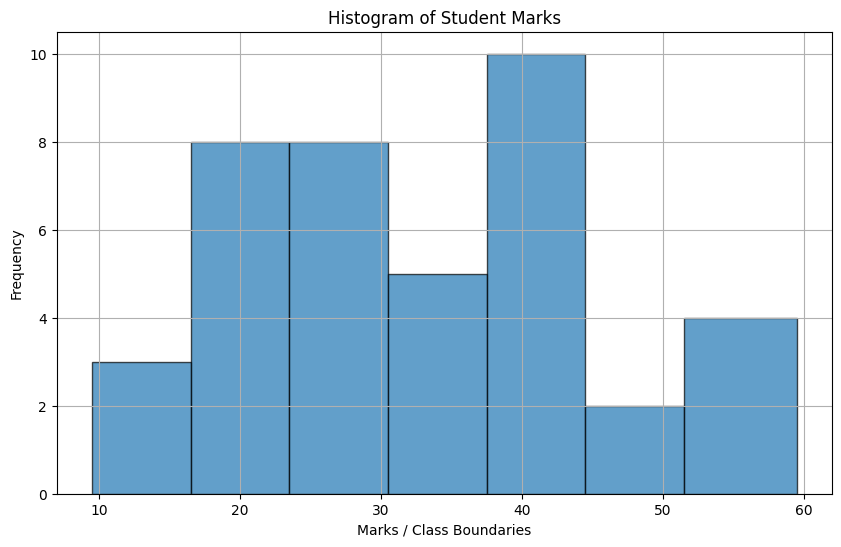

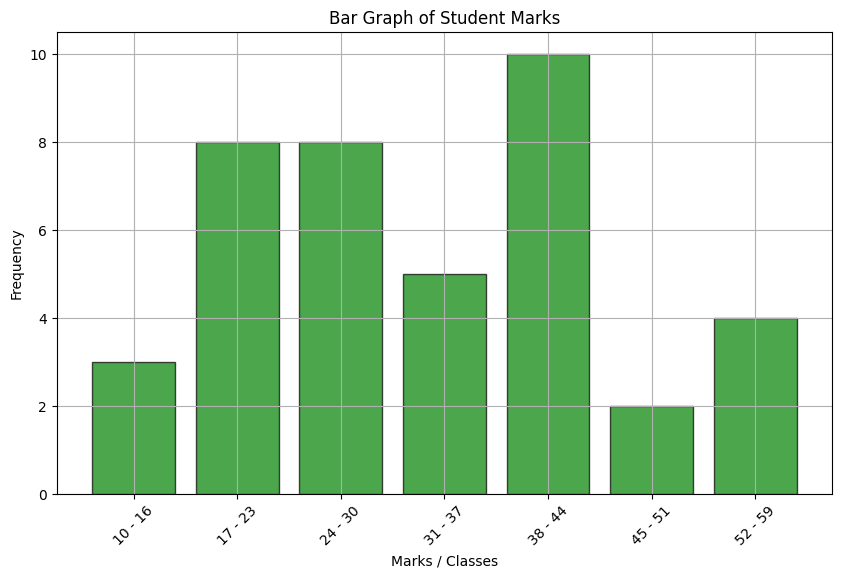

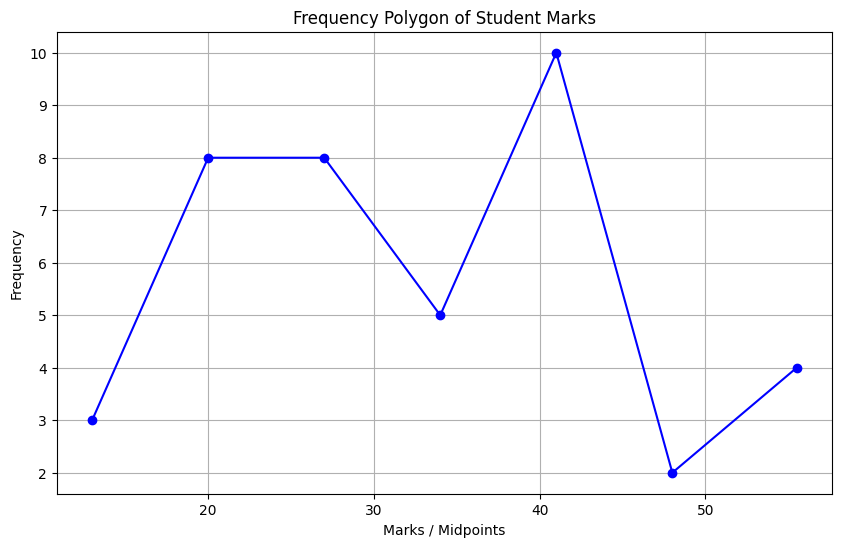

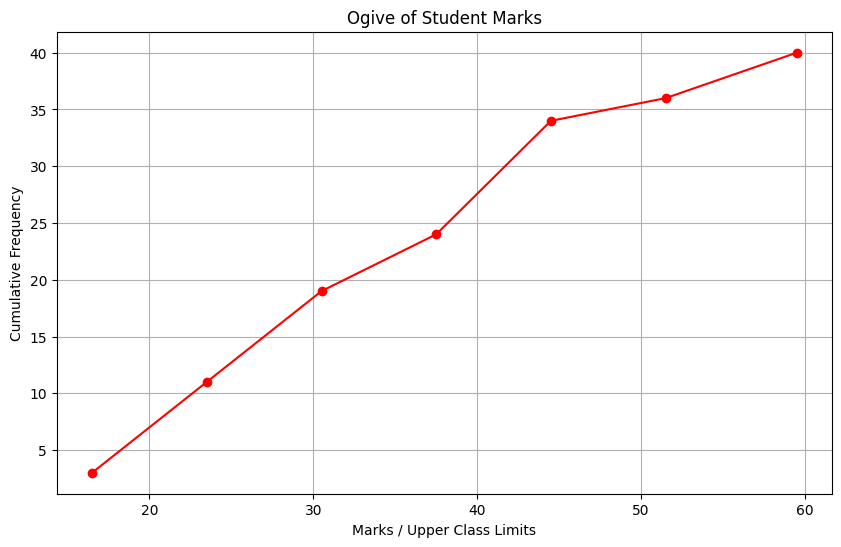

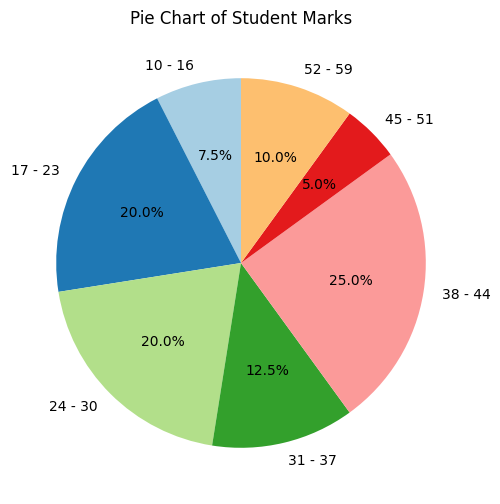

In [15]:
# Generate graphs
# Histogram (Class boundaries vs Frequency)
plt.figure(figsize=(10, 6))
class_boundary_values = [b[0] for b in class_boundaries] + [class_boundaries[-1][1]]
plt.hist(data, bins=class_boundary_values, edgecolor='black', alpha=0.7)
plt.title('Histogram of Student Marks')
plt.xlabel('Marks / Class Boundaries')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Bar graph (Classes vs Frequency)
plt.figure(figsize=(10, 6))
plt.bar(classes, frequency, color='green', alpha=0.7, edgecolor='black')
plt.title('Bar Graph of Student Marks')
plt.xlabel('Marks / Classes')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Frequency Polygon (Midpoints vs Frequency)
plt.figure(figsize=(10, 6))
plt.plot(class_marks, frequency, marker='o', color='b', label='Frequency Polygon')
plt.title('Frequency Polygon of Student Marks')
plt.xlabel('Marks / Midpoints')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# Ogive (Upper class limits vs Cumulative frequency)
upper_class_limits = [b[1] for b in class_boundaries]
plt.figure(figsize=(10, 6))
plt.plot(upper_class_limits, cumulative_frequency, marker='o', color='r', label='Ogive')
plt.title('Ogive of Student Marks')
plt.xlabel('Marks / Upper Class Limits')
plt.ylabel('Cumulative Frequency')
plt.grid(True)
plt.show()

# Pie Chart (Classes vs Frequency)
angles = [f / sum(frequency) * 360 for f in frequency]
plt.figure(figsize=(10, 6))
plt.pie(frequency, labels=classes, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Pie Chart of Student Marks')
plt.show()



***For Ungrouped Data Set***
Arithmetic Mean: 32.98
Harmonic Mean: 27.82
Geometric Mean: 30.47
Median: 31.5
Mode: [19, 27, 29, 40, 42]
Q1 (1st Quartile): 22.75
Q2 (2nd Quartile / Median): 31.5
Q3 (3rd Quartile): 41.25
D3 (3rd Decile): 27.0
D5 (5th Decile / Median): 31.5
P50 (50th Percentile / Median): 31.5
P90 (90th Percentile): 51.3
Q2 = D5 = P50 = Median


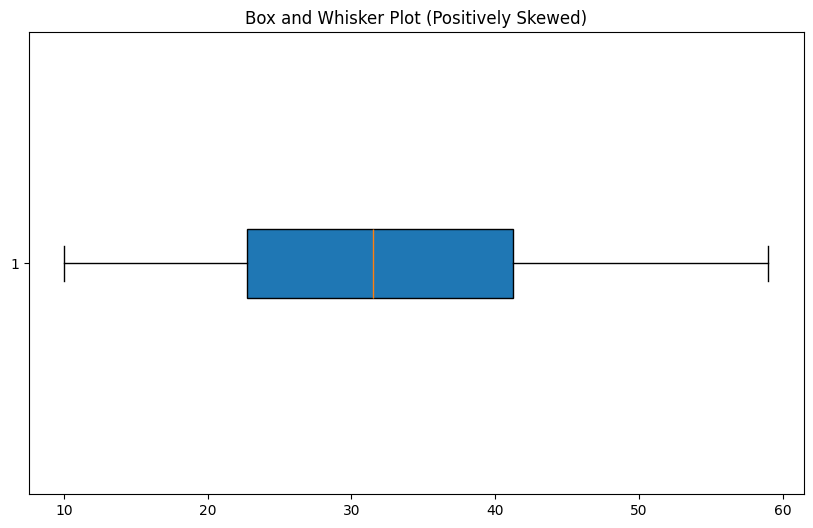

In [16]:
# Calculate basic statistical measures

print('\n***For Ungrouped Data Set***')
# Arithmetic Mean
arithmetic_mean = np.mean(data)

# Harmonic Mean
harmonic_mean = stats.hmean(data)

# Geometric Mean
geometric_mean = stats.gmean(data)

# Sort data for median, quartiles, deciles, and percentiles calculation
data_sorted = sorted(data)

# Median
median = np.median(data_sorted)

# Find all modes in ungrouped data
mode_count = stats.mode(data, keepdims=True)
mode_value = mode_count.mode[0]  # This is the first mode
mode_freq = mode_count.count[0]  # Frequency of the mode

# Check for other modes with the same frequency
modes = [x for x in set(data) if data.count(x) == mode_freq]

# Quartiles
Q1 = np.percentile(data_sorted, 25)  # 1st quartile
Q2 = np.percentile(data_sorted, 50)  # 2nd quartile (median)
Q3 = np.percentile(data_sorted, 75)  # 3rd quartile

# Deciles
D3 = np.percentile(data_sorted, 30)  # 3rd decile
D5 = np.percentile(data_sorted, 50)  # 5th decile (median)

# Percentiles
P50 = np.percentile(data_sorted, 50)  # 50th percentile (median)
# Percentiles for ungrouped data (rounded to 2 decimal places)
P90 = round(np.percentile(data_sorted, 90), 2)

# Print calculated statistical measures
print(f"Arithmetic Mean: {arithmetic_mean:.2f}")
print(f"Harmonic Mean: {harmonic_mean:.2f}")
print(f"Geometric Mean: {geometric_mean:.2f}")
print(f"Median: {median}")
print(f"Mode: {modes}")
print(f"Q1 (1st Quartile): {Q1}")
print(f"Q2 (2nd Quartile / Median): {Q2}")
print(f"Q3 (3rd Quartile): {Q3}")
print(f"D3 (3rd Decile): {D3}")
print(f"D5 (5th Decile / Median): {D5}")
print(f"P50 (50th Percentile / Median): {P50}")
print(f"P90 (90th Percentile): {P90}")

# Verify the relationship Q2 = D5 = P50
if Q2 == D5 == P50:
    print("Q2 = D5 = P50 = Median")
else:
    print("The values are not equal, there might be an issue.")


# Show the plot
min_value = min(data)
max_value = max(data)

plt.figure(figsize=(10, 6))

# Box and Whisker graph using calculated Q1, Q2 (median), and Q3
plt.boxplot(data, vert=False, patch_artist=True)

# Interpretation of skewness
if Q3 - Q2 == Q2 - Q1:
    skewness = "Symmetric"
elif Q3 - Q2 > Q2 - Q1:
    skewness = "Positively Skewed"
else:
    skewness = "Negatively Skewed"

# Adding interpretation text
plt.title(f'Box and Whisker Plot ({skewness})')

# Display plot
plt.show()




***For Grouped Data Set***
Arithmetic Mean: 32.95
Harmonic Mean: 27.96
Geometric Mean: 30.48
Median: 32.2
Mode: 40.30769230769231
Q1 (1st Quartile): 22.25
Q2 (2nd Quartile / Median): 32.2
Q3 (3rd Quartile): 41.6
D3 (3rd Decile): 24.75
D5 (5th Decile / Median): 32.2
P50 (50th Percentile / Median): 32.2
P90 (90th Percentile): 51.0
Q2 = D5 = P50 = Median


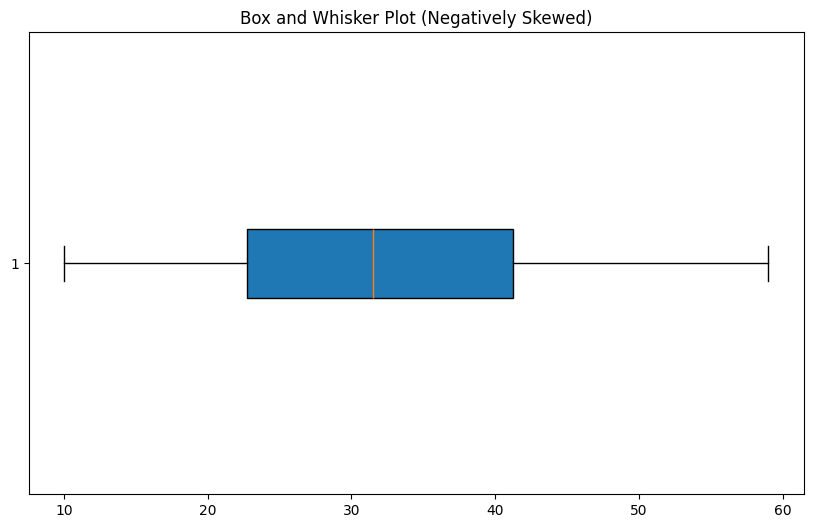

In [17]:

print('\n***For Grouped Data Set***')
# CONVERTING THE UNGROUPED DATA SET INTO GROUPED DATASET

# Define the ungrouped dataset
data = [
    42, 22, 55, 18, 50, 10, 33, 29, 17, 29, 29, 27, 34, 
    15, 40, 42, 40, 41, 35, 27, 44, 31, 38, 19, 54, 55, 38,
    19, 20, 30, 42, 59, 15, 19, 27, 23, 40, 32, 28, 51
]

# Convert ungrouped data into grouped data (Classes and frequencies)

classes = [(10, 16), (17, 23), (24, 30), (31, 37), (38, 44), (45, 51), (52, 58), (59, 65)]

# Calculate frequencies for each class
frequencies = [sum(1 for x in data if lower <= x <= upper) for lower, upper in classes]

# Calculate the class marks (midpoints)
class_marks = [(lower + upper) / 2 for lower, upper in classes]

# Calculate total frequency
sum_f = sum(frequencies)

# Arithmetic Mean (AM)
sum_fx = sum(f * x for f, x in zip(frequencies, class_marks))
arithmetic_mean = sum_fx / sum_f

# Geometric Mean (GM)
log_class_marks = np.log(class_marks)  # Take log of the class marks
sum_f_logx = sum(f * log_x for f, log_x in zip(frequencies, log_class_marks))
geometric_mean = np.exp(sum_f_logx / sum_f)  # Antilog by taking exponential

# Harmonic Mean (HM)
sum_f_by_x = sum(f / x for f, x in zip(frequencies, class_marks))
harmonic_mean = sum_f / sum_f_by_x

# Median for Grouped Data
# Formula: Median = L + [(N/2 - F) / f] * w
# where N = sum of frequencies, F = cumulative frequency before median class, f = frequency of median class, w = class width
N = sum_f
cumulative_frequencies = np.cumsum(frequencies)
median_class_index = np.argmax(cumulative_frequencies >= N/2)
L = classes[median_class_index][0]  # Lower bound of the median class
F = cumulative_frequencies[median_class_index - 1] if median_class_index > 0 else 0
f_median = frequencies[median_class_index]
w = classes[0][1] - classes[0][0]  # Assuming equal class width

median = L + ((N / 2 - F) / f_median) * w

# Mode for Grouped Data
# Formula: Mode = L + [(f1 - f0) / ((f1 - f0) + (f1 - f2))] * w
mode_class_index = np.argmax(frequencies)
L_mode = classes[mode_class_index][0]
f1 = frequencies[mode_class_index]
f0 = frequencies[mode_class_index - 1] if mode_class_index > 0 else 0
f2 = frequencies[mode_class_index + 1] if mode_class_index < len(frequencies) - 1 else 0

mode = L_mode + ((f1 - f0) / ((f1 - f0) + (f1 - f2))) * w

# Quartiles for Grouped Data (Q1, Q2, Q3)
Q1_index = np.argmax(cumulative_frequencies >= N / 4)
Q3_index = np.argmax(cumulative_frequencies >= 3 * N / 4)

Q1 = classes[Q1_index][0] + ((N / 4 - cumulative_frequencies[Q1_index - 1]) / frequencies[Q1_index]) * w
Q2 = median
Q3 = classes[Q3_index][0] + ((3 * N / 4 - cumulative_frequencies[Q3_index - 1]) / frequencies[Q3_index]) * w

# Deciles for Grouped Data (D3, D5)
D3_index = np.argmax(cumulative_frequencies >= 3 * N / 10)
D5_index = np.argmax(cumulative_frequencies >= 5 * N / 10)

D3 = classes[D3_index][0] + ((3 * N / 10 - cumulative_frequencies[D3_index - 1]) / frequencies[D3_index]) * w
D5 = classes[D5_index][0] + ((5 * N / 10 - cumulative_frequencies[D5_index - 1]) / frequencies[D5_index]) * w

# Percentiles for Grouped Data (P50, P90)
P50 = Q2
P90_index = np.argmax(cumulative_frequencies >= 9 * N / 10)

P90 = classes[P90_index][0] + ((9 * N / 10 - cumulative_frequencies[P90_index - 1]) / frequencies[P90_index]) * w

# Print calculated statistical measures
print(f"Arithmetic Mean: {arithmetic_mean:.2f}")
print(f"Harmonic Mean: {harmonic_mean:.2f}")
print(f"Geometric Mean: {geometric_mean:.2f}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Q1 (1st Quartile): {Q1}")
print(f"Q2 (2nd Quartile / Median): {Q2}")
print(f"Q3 (3rd Quartile): {Q3}")
print(f"D3 (3rd Decile): {D3}")
print(f"D5 (5th Decile / Median): {D5}")
print(f"P50 (50th Percentile / Median): {P50}")
print(f"P90 (90th Percentile): {P90}")

# Verify the relationship Q2 = D5 = P50
if Q2 == D5 == P50:
    print("Q2 = D5 = P50 = Median")
else:
    print("The values are not equal, there might be an issue.")
    
    
# Create Box and Whisker Plot
min_value = min(data)
max_value = max(data)

plt.figure(figsize=(10, 6))

# Boxplot using calculated Q1, Q2 (median), and Q3
plt.boxplot(data, vert=False, patch_artist=True)

# Interpretation of skewness
if Q3 - Q2 == Q2 - Q1:
    skewness = "Symmetric"
elif Q3 - Q2 > Q2 - Q1:
    skewness = "Positively Skewed"
else:
    skewness = "Negatively Skewed"

# Adding interpretation text
plt.title(f'Box and Whisker Plot ({skewness})')

# Display plot
plt.show()



In [18]:
# Measures of Despersion
# for UNGROUPED DATA SET

# Sample dataset (Ungrouped)
data = [42, 22, 55, 18, 50 , 10 ,33,29 ,17 ,29, 29 , 27 , 34, 15, 40, 42, 40, 41,35, 27, 44 ,31, 38, 19,54,55,38 ,19, 20, 30, 42, 59, 15,19, 27, 23, 40, 32,28, 51]


# Range
range_val = max(data) - min(data)

# Variance
mean = np.mean(data)
variance = sum((x - mean) ** 2 for x in data) / len(data)

# Standard Deviation
std_dev = math.sqrt(variance)

# Coefficient of Variation
cv = (std_dev / mean) * 100



# Print results for ungrouped data
print("\nUNGROUPED DATASET MEASURES OF DISPERSION")
print(f"Range: {range_val:.2f}")
print(f"Variance: {variance:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Coefficient of Variation: {cv:.2f}")


UNGROUPED DATASET MEASURES OF DISPERSION
Range: 49.00
Variance: 153.97
Standard Deviation: 12.41
Coefficient of Variation: 37.63


In [19]:

# for GROUPED DATA SET
# Convert ungrouped data into grouped data
# Using class intervals: let's choose equal class intervals of size 10

classes = [(10, 16), (17, 23), (24, 30), (31, 37), (38, 44), (45, 51), (52, 58), (59, 65)]

# Calculate frequencies for each class
frequencies = [sum(1 for x in data if lower <= x <= upper) for lower, upper in classes]

# Calculate class marks (midpoints)
class_marks = [(lower + upper) / 2 for lower, upper in classes]

# Total frequency
N = sum(frequencies)

# Calculate mean for grouped data
mean_grouped = sum(f * x for f, x in zip(frequencies, class_marks)) / N

# Range for grouped data
range_grouped = classes[-1][1] - classes[0][0]

# Variance for grouped data
variance_grouped = sum(f * (x - mean_grouped) ** 2 for f, x in zip(frequencies, class_marks)) / N

# Standard Deviation for grouped data
std_dev_grouped = math.sqrt(variance_grouped)

# Coefficient of Variation for grouped data
cv_grouped = (std_dev_grouped / mean_grouped) * 100



# Print results for grouped data
print("\nGROUPED DATASET MEASURES OF DISPERSION")
print(f"Range: {range_grouped:.2f}")
print(f"Variance: {variance_grouped:.2f}")
print(f"Standard Deviation: {std_dev_grouped:.2f}")
print(f"Coefficient of Variation: {cv_grouped:.2f}")



GROUPED DATASET MEASURES OF DISPERSION
Range: 55.00
Variance: 155.70
Standard Deviation: 12.48
Coefficient of Variation: 37.87
